<a href="https://colab.research.google.com/github/ParasAtal/Computer-Vision/blob/main/Card_tampering_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [2]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image 

In [5]:
original=Image.open(requests.get('https://i.pinimg.com/236x/46/91/f1/4691f19733dbc38843295f5b4e8fc5e3.jpg', stream=True).raw)
tampered=Image.open(requests.get('https://editor.analyticsvidhya.com/uploads/29469original.png', stream=True).raw)


In [6]:
print("Original image format:",original.format)
print("Original image format:",tampered.format)

Original image format: JPEG
Original image format: PNG


In [8]:
print("Original image size:",original.size)
print("tampered image size:",tampered.size)

Original image size: (236, 148)
tampered image size: (250, 160)


In [9]:
original=original.resize((250,160))
print(original.size)
original.save('pan_card_tampering/image/original.png')
tampered=tampered.resize((250,160))
print(tampered.size)
tampered.save('pan_card_tampering/image/tampered.png')


(250, 160)
(250, 160)


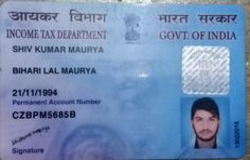

In [10]:
original

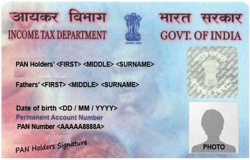

In [11]:
tampered

In [14]:
original=cv2.imread('pan_card_tampering/image/original.png')
tampered=cv2.imread('pan_card_tampering/image/tampered.png')

In [15]:
original_gray=cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
tampered_gray=cv2.cvtColor(tampered,cv2.COLOR_BGR2GRAY)

In [16]:
(score,diff) = structural_similarity(original_gray,tampered_gray,full=True)
diff=(diff*255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.2891205735937651


In [17]:
thresh=cv2.threshold(diff,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts=cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts=imutils.grab_contours(cnts)

In [18]:
for c in cnts:
  (x,y,w,h)=cv2.boundingRect(c)
  cv2.rectangle(original,(x,y),(x+w,y+h),(0,0,255),2)
  cv2.rectangle(tampered,(x,y),(x+w,y+h),(0,0,255),2)

Original Format Image


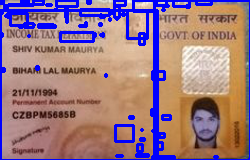

In [19]:
print("Original Format Image")
Image.fromarray(original)

Tampered Image


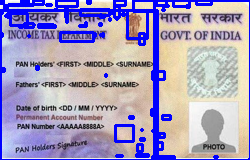

In [20]:
print("Tampered Image")
Image.fromarray(tampered)


Different Image


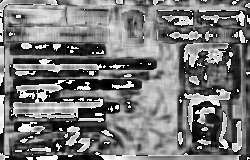

In [21]:
print("Different Image")
Image.fromarray(diff)

Threshold Image


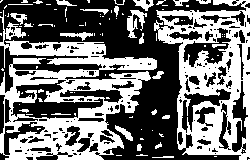

In [22]:
print("Threshold Image")
Image.fromarray(thresh)